# EDA:

**Exploratory Data Analysis** is task of analyzing data using simple tools , using statistics, using some plotting tools , from linear algebra and other imp techniques. It is important to understand the dataset before applying it build a model.

This is very important step and first thing when we go for model building.

It is called **Exploratory** because we do not know anything about data initially. To get the complete understanding about the data we perform EDA.

In [7]:
# importing all required packages used for EDA 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings("ignore")

> OBJECTIVE OF IRIS FLOWER DATASET : CLASSIFY THE NEW FLOWER AS BELONGING TO ONE OF THE 3 CLASSES GIVEN THE 4 FEATURES.

> COLUMN NAME : VARIABLES OR INDEPENDENT VARIABLES

> VALUES : DATA POINTS OR VECTOR OR OBSERVATION (vectors -- > n-dimensional array, 1 d vector --> scalar)

> TARGET : CLASS LABEL OR DEPENDENT VARIABLES OR CLASS NAMES OR OUTPUT VARIABLES

### Q.1: How many data points and features are in the dataset ? 

In [8]:
#step 1: load data and get shape

data = pd.read_csv("D:\\PycharmProjects\\Edureka_ML\\Iris.csv")
data.drop('Id',axis = 1,inplace = True)
data.shape

(150, 5)

### Q.2: What are the column (feature) names in dataset ?  

In [9]:
# step 2: get feature names
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Q.3: How many classes are present in dataset ?

In [10]:
# get unique value from class (no.of class)
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Q.4: How many data points belongs to each class?Also check whether the dataset is balanced or imbalenced ??

In [11]:
# get count of data points belongs to each class
data['Species'].value_counts()

# A balanced dataset as each class is having equal datapoints.

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

# Histogram Plot:

It gives the frequency (or) distribution of dataset in the form of bargraph.

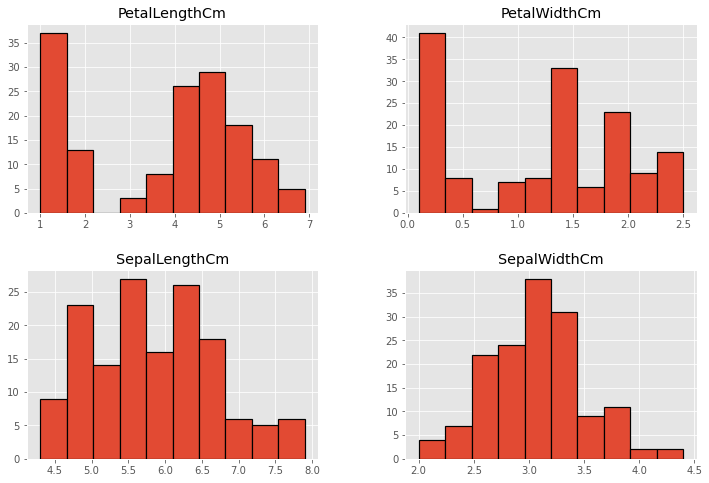

In [12]:
matplotlib.style.use("ggplot")
data.hist(edgecolor = 'black',linewidth = 1.2,figsize = (12,8)) # x-axis : data, y-axis : count
plt.show()

### Observation:

[PL : Petal Length, PW : Petal Width, SL : Sepal Length, SW : Sepal Width]
1. **range of data:** PL- 1 to 7, PW - 0 to 2.5, SL - 4 to 8, SW - 2.0 to 4.5
2. **most occcuring values are in between:** PL - 1 to 1.5, PW - 0 to 0.3,SL- 5.5 to 5.7,SW- 3 to 3.25
3. **least occuring values are in between:** PL - 3 to 3.5, PW - 0.5 to 0.7, SL- 7 to 7.5,SW- 4 to 4.5

# 2 - D Scatter Plot:

[bivariate analysis]

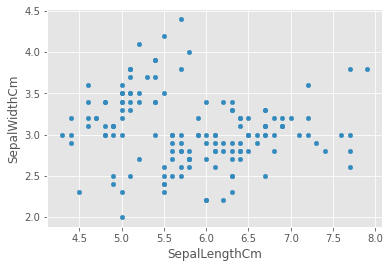

In [13]:
# Always understand the axis : labels and scales
matplotlib.style.use("ggplot") # set style using matplotlib

data.plot(kind = "scatter",x = "SepalLengthCm",y = "SepalWidthCm") # using pandas
plt.show()


# same thing using matplotlib
#plt.scatter(x,y,label = 'Points_1',color = 'k',s = 70,marker = 'o') # scatter plot 1

In [14]:
# not making much sense. from the above graph we only get the information that
# range of x (SepalLength) ----> 4 t0 8 and y(SepalWidth) ----> 2 to 4.5

### PLOT DIFFERENT COLORS OF DATAPOINTS FOR EACH CLASS

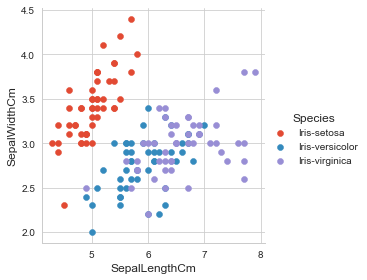

In [15]:
sns.set_style("whitegrid") # set style using seaborn

sns.FacetGrid(data,hue = "Species",height = 4).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()


### observation from the plot:
1. setosa can be saperated by linear line (linearly saperable) but versicolor and virginica can be difficult to classify (not linearly saprable).

# 3-D Scatter Plot:

using plotly.

# Pair Plot:

[bivariate analysis]

In [16]:
# can see all 4 variaables in one plot.
# pairwise scatter plot.
# limitations: only possible to view 2-d plots and not good for large no. of features.

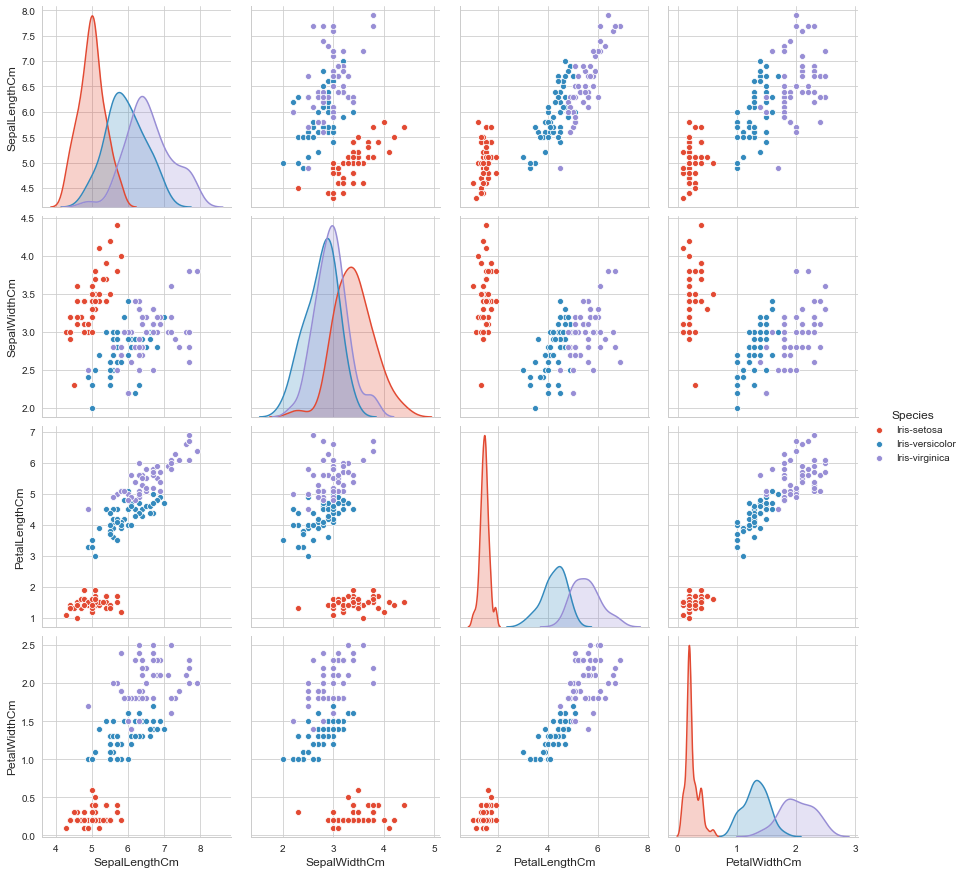

In [17]:
sns.set_style("whitegrid")
sns.pairplot(data, hue = "Species",height = 3,aspect = 1)
plt.show()

### observation from the plot:
1. PetalLength and PetalWidth are most useful features to identify various flower types.
2. satosa can be easily classified but verginica and versicolor are difficult to classify.
3. we can use "lines" or "if-else" condition to build simple model to classify the flowers.

### Limitations:
if we have less no. of features then all the plots in pairplot can be viewed easily but if we have large no. of features then pairplot is not a good choice. 

# Univariate Analysis :
(use simple probability density function and hist plots)


**One variable analysis is called univariate analysis.**

> (Q.) which of the 4 variable are more useful than other ??

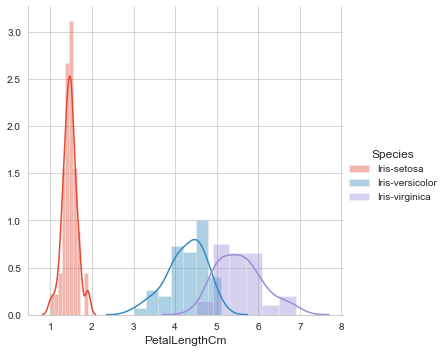

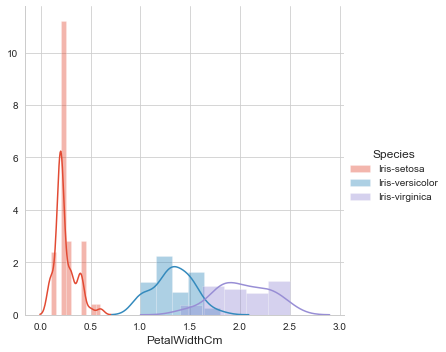

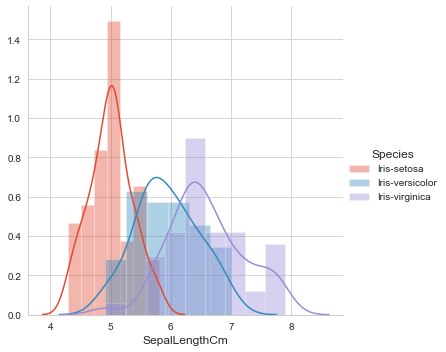

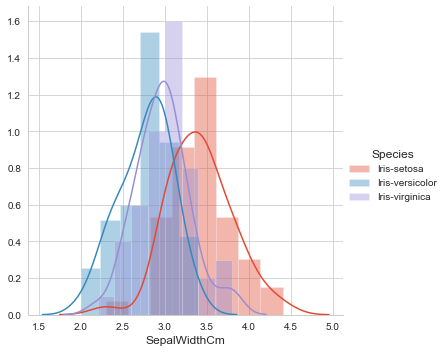

In [18]:
sns.FacetGrid(data,hue="Species",height = 5).map(sns.distplot,'PetalLengthCm').add_legend()
plt.show()
sns.FacetGrid(data,hue="Species",height = 5).map(sns.distplot,'PetalWidthCm').add_legend()
plt.show()
sns.FacetGrid(data,hue="Species",height = 5).map(sns.distplot,'SepalLengthCm').add_legend()
plt.show()
sns.FacetGrid(data,hue="Species",height = 5).map(sns.distplot,'SepalWidthCm').add_legend()
plt.show()

### Observation from Univariate analysis:

**A Good feature should have well saperated datapoints of each class. The distance between each class should be maximum.**

1. In petal length feature, setosa is well saperated than other two classes and there is slight overlap between versicolor and verginica.
2. In petal width feature, there is small intersection point of setosa with versicolor but can be neglected. The distribution of versicolor and verginica is wide and having slight (but more than petal length) overlap between versicolor and verginica.
3. In sepal length and sepal width there is high overlap between classes. Saperation of these classes are not possible using straight line. they are quite difficult. Overlapping area is more in sepal width than sepal length.

*If we have to choose best feature, then **petal length** will be preferred.*

> **PETAL LENGTH >  PETAL WIDTH >> SEPAL LENGTH >> SEPAL WIDTH**   (Goodness of feature)

# Mean:

**Mean : simple average** [sum of obseravation / no. of observation]

Mean tells us about central tendancy. It gives us the average bahaviour of our data.
If outlier present in the dataset then it will affect mean value. 

In [19]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
setosa = data[data['Species'] == 'Iris-setosa']
versicolor = data[data['Species'] == 'Iris-versicolor']
virginica = data[data['Species'] == 'Iris-virginica']

In [21]:
print('Mean:Setosa')
print(np.mean(setosa['PetalLengthCm']))
print('************************')
print('Mean:Versicolor')
print(np.mean(versicolor['PetalLengthCm']))
print('************************')
print('Mean:Virginica')
print(np.mean(virginica['PetalLengthCm']))

# Mean with outlier
print("************************\nOutlier effect :\nFor setosa (PetalLength):",end = " ")
print(np.mean(np.append(setosa['PetalLengthCm'],50)))  # add one point which is 50 (very large as compared to other)

Mean:Setosa
1.464
************************
Mean:Versicolor
4.26
************************
Mean:Virginica
5.5520000000000005
************************
Outlier effect :
For setosa (PetalLength): 2.4156862745098038


### Observation :
1. Setosa has very small petal length as compared to the petal length of verginica and versicolor.
2. Outliers drastically afftect the mean value. which is not good for model.

# Std. Deviation:

**Std.deviation: spreading** [square root of mean]

Std. Devaiation tells us how much spread our distribution is (or) how far our data point from its mean. It is square root of variance. Highly affected by outliers.

>**Lesser the std. deviation --> spreading is less --> narrow distribution -- > data point is more closer to mean --> good model**

In [22]:
print('STD:Setosa')
print(np.std(setosa['PetalLengthCm']))
print('************************')
print('STD:Versicolor')
print(np.std(versicolor['PetalLengthCm']))
print('************************')
print('STD:Virginica')
print(np.std(virginica['PetalLengthCm']))

# Std deviation with outlier
print("************************\nOutlier effect :\nFor setosa (PetalLength):",end = " ")
print(np.std(np.append(setosa['PetalLengthCm'],50)))  # add one point which is 50 (very large as compared to other)

STD:Setosa
0.17176728442867112
************************
STD:Versicolor
0.4651881339845203
************************
STD:Virginica
0.546347874526844
************************
Outlier effect :
For setosa (PetalLength): 6.731587015311736


#### Observation:
1. std. deviation is less for setosa. That means distribution is narrrow and it is good feature.
2. affected by outliers.

# Median:

Mid value of sorted datapoints. It is also a measure of central tendancy just like the mean **but median is not (or less) affected by outliers if no. of outliers are less than 50%.**

In [23]:
print('Median:Setosa')
print(np.median(setosa['PetalLengthCm']))
print('************************')
print('Median:Versicolor')
print(np.median(versicolor['PetalLengthCm']))
print('************************')
print('Median:Virginica')
print(np.median(virginica['PetalLengthCm']))

# Median with outlier
print("************************\nOutlier effect :\nFor setosa (PetalLength):",end = " ")
print(np.median(np.append(setosa['PetalLengthCm'],50)))  # add one point which is 50 (very large as compared to other)

Median:Setosa
1.5
************************
Median:Versicolor
4.35
************************
Median:Virginica
5.55
************************
Outlier effect :
For setosa (PetalLength): 1.5


### Observation:
1. Setosa has very less median value.
2. all the median values are approximately equal to mean values.
3. Median value is not affected by outliers if no. of outliers are less than 50% of data otherwise it will affected by this.

# Quantile & Percentile:

**Percentile gives us the location of data points from the sorted array, starting with index = 1.**

**nth percentile : data points or value at nth position** [index = n, starting index = 0]......It tells us that n% of  values are lesser than the nth percentile value and remaining (total no. of data points - n )% of values are greater than nth percentile.

>Ex. An array having 100 datapoints. so, 10th percentile value = value at 10th position. that means 10% of values are less than 10th percentile value and 90% of values are more than 10th percentile value. 

**50th percentile : Median**

**Quantile is 25th, 50th, 75th, 100th percentile values. They are 1st,2nd,3rd and 4th quantile respectively.**

In [24]:
print('Quantile:Setosa')
print(np.percentile(setosa['PetalLengthCm'],np.arange(0,100,25)))
print('Quantile:Versicolor')
print(np.percentile(versicolor['PetalLengthCm'],np.arange(0,100,25)))
print('Quantile:Virginica')
print(np.percentile(virginica['PetalLengthCm'],np.arange(0,100,25)))

Quantile:Setosa
[1.    1.4   1.5   1.575]
Quantile:Versicolor
[3.   4.   4.35 4.6 ]
Quantile:Virginica
[4.5   5.1   5.55  5.875]


In [25]:
print("*******************\n  90th percentile:\n*******************")
print('Percentile:Setosa')
print(np.percentile(setosa['PetalLengthCm'],90))
print('Percentile:Versicolor')
print(np.percentile(versicolor['PetalLengthCm'],90))
print('Percentile:Virginica')
print(np.percentile(virginica['PetalLengthCm'],90))
print("\n*******************\n  50th percentile:\n*******************")
print('Percentile:Setosa')
print(np.percentile(setosa['PetalLengthCm'],50))
print('Percentile:Versicolor')
print(np.percentile(versicolor['PetalLengthCm'],50))
print('Percentile:Virginica')
print(np.percentile(virginica['PetalLengthCm'],50))

*******************
  90th percentile:
*******************
Percentile:Setosa
1.7
Percentile:Versicolor
4.8
Percentile:Virginica
6.3100000000000005

*******************
  50th percentile:
*******************
Percentile:Setosa
1.5
Percentile:Versicolor
4.35
Percentile:Virginica
5.55


### Observation:
1. 50th percentile value is eual to median.
2. 90th and 99th percentile values are important.


# Median Absolute Deviation (MAD):

One of the idea which is somehow equivalent to std. deviation.
MAD is **Median of absolute deviation of any datapoints from its median.**

>  $MAD = Median(|x_{i} - median|_{i= 1:n})$

we can also do it with mean but if there is any corrupted point then it will affected also.

In [26]:
from statsmodels import robust

print('MAD:Setosa')
print(robust.mad(setosa['PetalLengthCm']))
print('************************')
print('MAD:Versicolor')
print(robust.mad(versicolor['PetalLengthCm']))
print('************************')
print('MAD:Virginica')
print(robust.mad(virginica['PetalLengthCm']))

MAD:Setosa
0.14826022185056031
************************
MAD:Versicolor
0.5189107764769602
************************
MAD:Virginica
0.6671709983275211


# Box Plots and Whiskers:

Box plots gives us the density of datapoints at different range of values (inter quartile range  = 75th - 25th percentile value). It is a graph that gives you a good indication of how the values in the data are spread out.

By simply seeing the data ditribution in any plot we can not tell that what is 25th percentile or 75th percentile of value.
so, we use Box plot for this purpose.

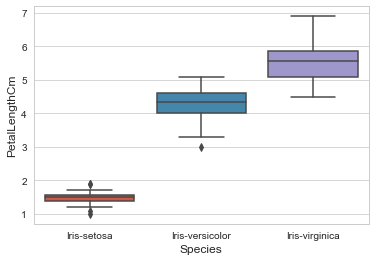

In [27]:
sns.boxplot(x = "Species",y = "PetalLengthCm",data = data)
plt.show()

> for each boxplot, *Lower layer : 25th percentile, mid layer: 50th percentile, upper layer : 75th percentile*

1. Not imp analysis from x- axis. but very imp analysis from y-axis.
2. whiskers are the upper and lower end of boxplot. There is not standard way to represent whiskers. It is taken as **"min-max values" or "(Q1-1.5xIQR) to (Q3 + 1.5xIQR)" values.**

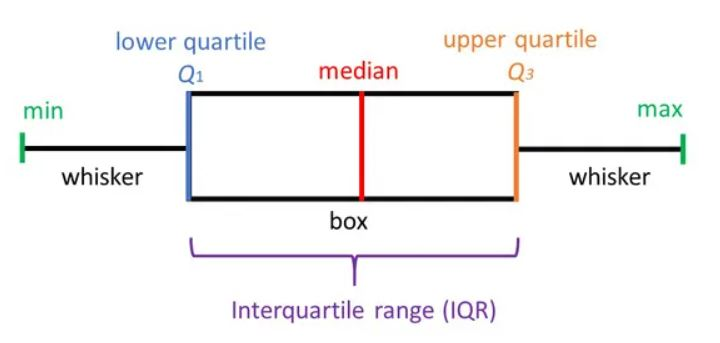

In [28]:
from IPython.display import Image
Image("C:/Users/sneha/Desktop/box.jpg",width = 500)

# Violin Plot:

Combine the adavantages of box plot and histogram plot and simplify it.

> Densor (high density) region of data : Fatter or thicker

> Sparser (low density) region of data : thinner

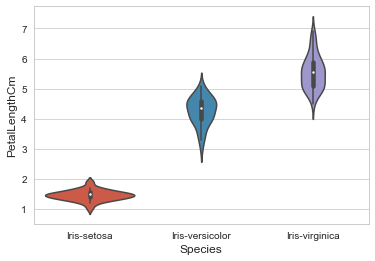

In [29]:
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = data, size = 8)
plt.show()

### Observation:
1. Inner part of violin plot is box plot which give us min whisker, 1st quartile, median, 2nd quartile, max whisker values.
2. Outer part of violin plot is probability distribution (or) distribution of data like in histogram plot.

# Multivariate PDF, Contour plot:

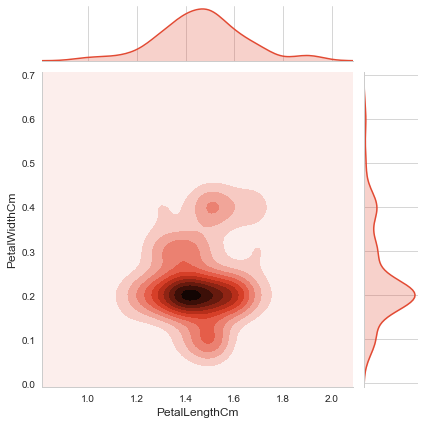

In [30]:
# 2-D density plot , contour plot
setosa = data[data['Species'] == 'Iris-setosa']
sns.jointplot(x = 'PetalLengthCm',y = 'PetalWidthCm',data = setosa, kind = "kde")
plt.show()

### Observation:
1. This is contour probability density plot.
2. The darker side of the plot shows the high density region of data.
3. The lighter side of the plot shows less density region of data.
4. It can be viewed in 3d plot in which the darker part will have more height than lighter part.

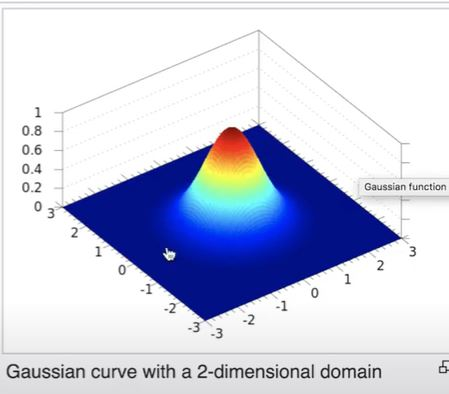

In [31]:
# In 3-d plot it will look like this plot
from IPython.display import Image
Image("C:/Users/sneha/Desktop/pic.jpg",width = 300)

### 1 -d density plots : Probability Density Plots, Histogram 
### 2 -d density plots : Contour Density Plots


# EDA imp points:
1. Write observation after each plot and write it in simple english that can understand by anyone.
2. Focus on objective (the problem you are solving). 
3. Perform all EDA aligned with objective.